In [1]:
#Importing the neccesary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the database which was scraped
df=pd.read_csv("Used_cars.csv")

In [3]:
df

,Unnamed: 0,Fuel,Kilometers_Driven,Transmission,Price
0,0,Petrol,"27,200",Automatic,6.90
1,1,Petrol,"45,716",Manual,8.99
2,2,Diesel,"46,365",Manual,7.72
3,3,Petrol,"30,480",Manual,4.50
4,4,Petrol,"82,496",Manual,8.72
...,...,...,...,...,...
7975,7975,Petrol,"32,447",Manual,28.99
7976,7976,Diesel,"70,865",Manual,17.50
7977,7977,Petrol,"18,603",Manual,23.75
7978,7978,Diesel,"98,628",Manual,17.50


In [4]:
df.describe()

,Unnamed: 0,Price
count,7980.000000,7980.000000
mean,3989.500000,8.129876
std,2303.771907,8.284680
min,0.000000,2.310000
25%,1994.750000,3.792500
50%,3989.500000,5.410000
75%,5984.250000,9.982500
max,7979.000000,59.500000


In [15]:
df.info()
#Kilometers_Driven column is numeric but type is shown as object which has to be converted 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7980 entries, 0 to 7979
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         7980 non-null   int64  
 1   Fuel               7980 non-null   object 
 2   Kilometers_Driven  7980 non-null   object 
 3   Transmission       7980 non-null   object 
 4   Price              7980 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 311.8+ KB


In [16]:
df.isnull().sum()
#No null values in the dataset

Unnamed: 0           0
Fuel                 0
Kilometers_Driven    0
Transmission         0
Price                0
dtype: int64

In [20]:
df

,Unnamed: 0,Fuel,Kilometers_Driven,Transmission,Price
0,0,Petrol,"27,200",Automatic,6.90
1,1,Petrol,"45,716",Manual,8.99
2,2,Diesel,"46,365",Manual,7.72
3,3,Petrol,"30,480",Manual,4.50
4,4,Petrol,"82,496",Manual,8.72
...,...,...,...,...,...
7975,7975,Petrol,"32,447",Manual,28.99
7976,7976,Diesel,"70,865",Manual,17.50
7977,7977,Petrol,"18,603",Manual,23.75
7978,7978,Diesel,"98,628",Manual,17.50


In [3]:
data=df.drop(["Unnamed: 0"], axis=1)
#Unnamed: 0 column is replica of index, hence eliminating it

In [22]:
data

,Fuel,Kilometers_Driven,Transmission,Price
0,Petrol,"27,200",Automatic,6.90
1,Petrol,"45,716",Manual,8.99
2,Diesel,"46,365",Manual,7.72
3,Petrol,"30,480",Manual,4.50
4,Petrol,"82,496",Manual,8.72
...,...,...,...,...
7975,Petrol,"32,447",Manual,28.99
7976,Diesel,"70,865",Manual,17.50
7977,Petrol,"18,603",Manual,23.75
7978,Diesel,"98,628",Manual,17.50


In [4]:
data['Kilometers_Driven']=data['Kilometers_Driven'].str.replace(',','')

In [5]:
data["Kilometers_Driven"]=data["Kilometers_Driven"].astype("int64")

# Univariate Analysis

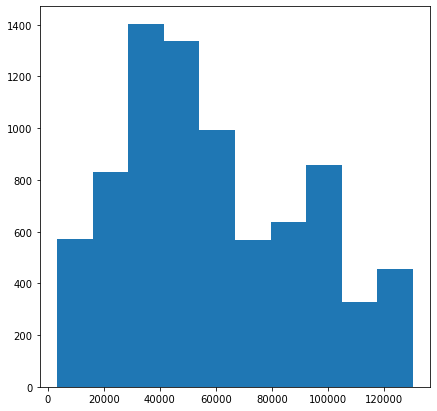

In [9]:
plt.figure(figsize=(7,7))
plt.hist(data["Kilometers_Driven"])
plt.show()

#Kilometer-driven is ranging from 5000 to 125000 and 1300-1400 cars have 30000 to 50000 kilometres-driven.

<AxesSubplot:xlabel='Fuel', ylabel='count'>

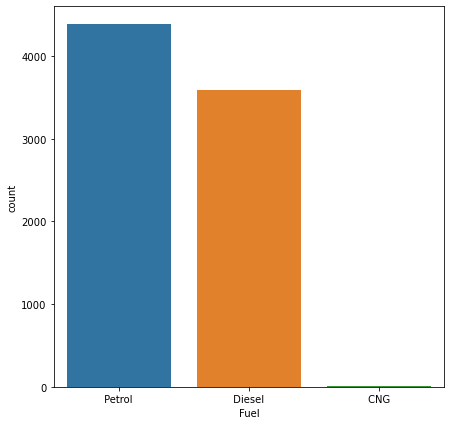

In [10]:
plt.figure(figsize=(7,7))
sns.countplot(data["Fuel"])

#4500 cars have Petrol fuel and 3500 cars have Diesel fuel and very few cars have CNG type fuel.

<AxesSubplot:xlabel='Transmission', ylabel='count'>

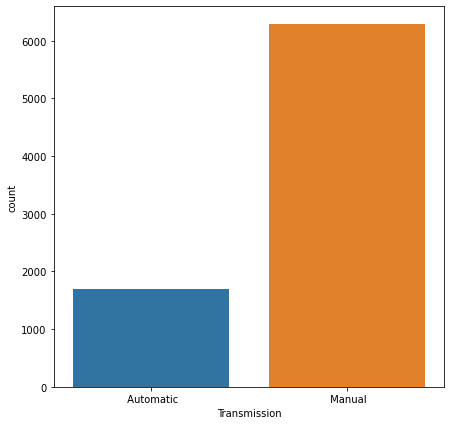

In [11]:
plt.figure(figsize=(7,7))
sns.countplot(data["Transmission"])

#6200 cars have Manual Transmission and 1600 cars have Automatic Transmission

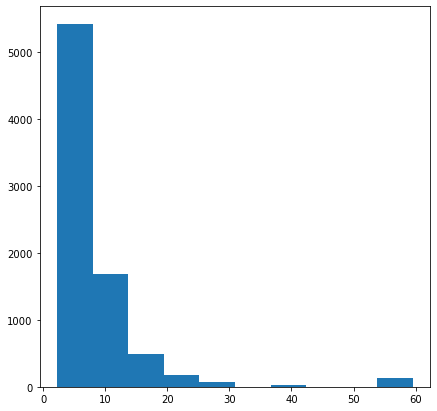

In [12]:
plt.figure(figsize=(7,7))
plt.hist(data["Price"])
plt.show()

#5500 cars have price from 2-5 lakhs followed by 1600 cars have price from 5-15 lakhs.

# Bivariate Analysis

<AxesSubplot:xlabel='Kilometers_Driven', ylabel='Price'>

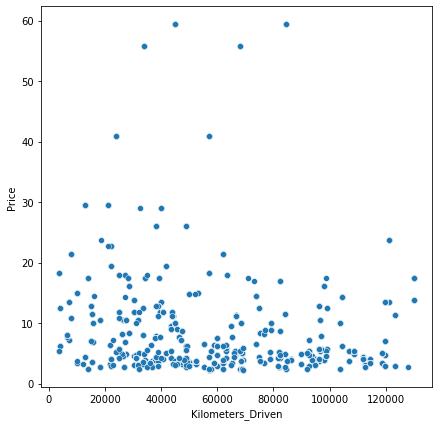

In [13]:
plt.figure(figsize=(7,7))
sns.scatterplot(data['Kilometers_Driven'],y=data['Price'])

#When the car has less kilometres driven the price is higher

<AxesSubplot:xlabel='Fuel', ylabel='Price'>

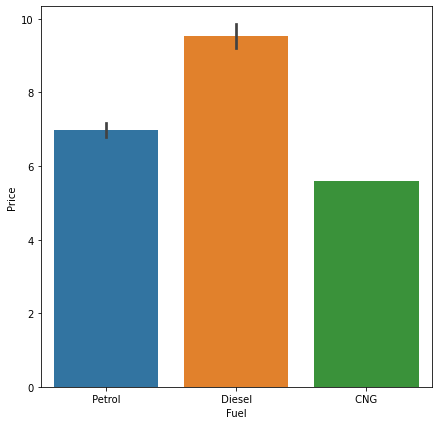

In [14]:
plt.figure(figsize=(7,7))
sns.barplot(x=data['Fuel'],y=data['Price'])

#With respect to fuel, used cars with Diesel fuel have higher price followed by Petrol and CNG.

<AxesSubplot:xlabel='Transmission', ylabel='Price'>

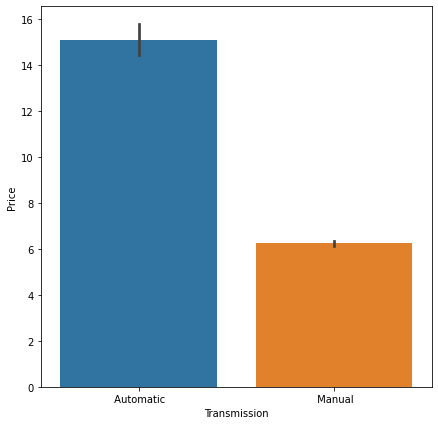

In [78]:
plt.figure(figsize=(7,7))
sns.barplot(x=data['Transmission'],y=data['Price'])

#Automatic Transmission cars have higher price compared to Manual Transmission cars.
#Automatic cars have price of 15 lakhs and Manual cars have price of 6 lakhs.

# Encoding Categorical Features

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


df_en=[i for i in data.columns if data[i].dtypes=='object']

In [7]:
for i in df_en:
    data[i]=le.fit_transform(data[i].values.reshape(-1,1))

In [8]:
data

,Fuel,Kilometers_Driven,Transmission,Price
0,2,27200,0,6.90
1,2,45716,1,8.99
2,1,46365,1,7.72
3,2,30480,1,4.50
4,2,82496,1,8.72
...,...,...,...,...
7975,2,32447,1,28.99
7976,1,70865,1,17.50
7977,2,18603,1,23.75
7978,1,98628,1,17.50


# Treating Outliers

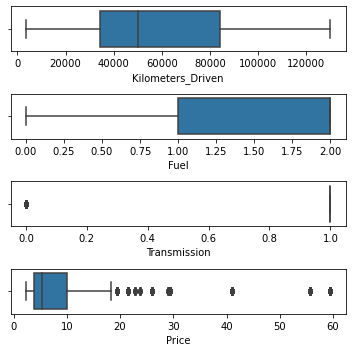

In [32]:
fig,ax=plt.subplots(4,figsize=(5,5))
plt1=sns.boxplot(df_new["Kilometers_Driven"],ax=ax[0])
plt2=sns.boxplot(df_new["Fuel"],ax=ax[1])
plt1=sns.boxplot(df_new["Transmission"],ax=ax[2])
plt2=sns.boxplot(df_new["Price"],ax=ax[3])
plt.tight_layout()

In [9]:
#Checking Z-Score for Outliers
from scipy import stats
clist=data.columns.values

z1=abs(stats.zscore(data[clist]))

In [10]:
x=np.where(z1>3)
x

(array([  19,   39,   59,   79,   99,  119,  139,  159,  179,  199,  219,
         239,  259,  279,  299,  319,  359,  399,  439,  479,  519,  559,
         599,  639,  679,  719,  759,  799,  839,  899,  959, 1019, 1079,
        1139, 1199, 1259, 1319, 1379, 1439, 1499, 1559, 1619, 1679, 1739,
        1819, 1899, 1979, 2059, 2139, 2219, 2299, 2379, 2459, 2539, 2619,
        2699, 2779, 2859, 2939, 3039, 3139, 3239, 3339, 3439, 3539, 3639,
        3739, 3839, 3939, 4039, 4139, 4239, 4321, 4327, 4359, 4441, 4447,
        4479, 4561, 4567, 4599, 4681, 4687, 4719, 4801, 4807, 4839, 4921,
        4927, 4959, 5041, 5047, 5079, 5161, 5167, 5199, 5281, 5287, 5319,
        5401, 5407, 5439, 5521, 5527, 5559, 5641, 5647, 5679, 5761, 5767,
        5799, 5881, 5887, 5919, 6001, 6007, 6039, 6121, 6127, 6179, 6261,
        6267, 6271, 6319, 6401, 6407, 6411, 6459, 6541, 6547, 6551, 6599,
        6681, 6687, 6691, 6739, 6821, 6827, 6831, 6879, 6961, 6967, 6971,
        7019, 7101, 7107, 7111, 7159, 

In [11]:
df_z=data[(z1 < 3).all(axis=1)]

In [12]:
print(data.shape,df_z.shape)

(7980, 4) (7809, 4)


In [13]:
#%data loss
a=(data.shape[0]-df_z.shape[0])/data.shape[0]
print(round(a*100,2))

2.14


<AxesSubplot:>

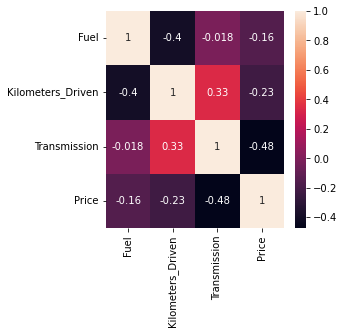

In [46]:
#Checking Correlation by plotting heatmap
plt.figure(figsize=(4,4))
sns.heatmap(df_z.corr(),annot=True)

# Splitting Features and Target

In [14]:
df_copy=df_z.copy()

In [15]:
#Splitting features and Target
X=df_copy.drop("Price",axis=1)
Y=df_copy[["Price"]]

In [16]:
#Scaling the features

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X_s=scaler.fit_transform(X)

In [17]:
#Applying power transform
from sklearn.preprocessing import power_transform

Xpt=power_transform(X_s)


In [140]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVR

from sklearn.ensemble import GradientBoostingRegressor

from xgboost import XGBRegressor

from sklearn.ensemble import AdaBoostRegressor


from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

In [141]:
lr=LinearRegression()

dt=DecisionTreeRegressor()

rf=RandomForestRegressor()

kn=KNeighborsRegressor(n_neighbors=3)

sv=SVR()

gb=GradientBoostingRegressor()

x=XGBRegressor()

ab=AdaBoostRegressor()


lst=[lr,dt,rf,kn,sv,gb,x,ab]

In [142]:
for i1 in lst:
    for i2 in range(0,6):
        x_train,x_test,y_train,y_test=train_test_split(Xpt,Y,random_state=i2,test_size=0.20)
        i1.fit(x_train,y_train)
        pred_test=i1.predict(x_test)
        pred_train=i1.predict(x_train)     
        print("Model:",i1,"random state",i2,"has r2 score-test",round(r2_score(y_test,pred_test),2),"and r2 score-train",round(r2_score(y_train,pred_train),2),"Mean Absolute Percentage Error is",round(mean_absolute_percentage_error(y_test,pred_test),2))
        

Model: LinearRegression() random state 0 has r2 score-test 0.31 and r2 score-train 0.28 Mean Absolute Percentage Error is 0.51
Model: LinearRegression() random state 1 has r2 score-test 0.27 and r2 score-train 0.29 Mean Absolute Percentage Error is 0.5
Model: LinearRegression() random state 2 has r2 score-test 0.22 and r2 score-train 0.3 Mean Absolute Percentage Error is 0.5
Model: LinearRegression() random state 3 has r2 score-test 0.26 and r2 score-train 0.29 Mean Absolute Percentage Error is 0.48
Model: LinearRegression() random state 4 has r2 score-test 0.26 and r2 score-train 0.29 Mean Absolute Percentage Error is 0.5
Model: LinearRegression() random state 5 has r2 score-test 0.31 and r2 score-train 0.28 Mean Absolute Percentage Error is 0.48
Model: DecisionTreeRegressor() random state 0 has r2 score-test 0.73 and r2 score-train 0.69 Mean Absolute Percentage Error is 0.26
Model: DecisionTreeRegressor() random state 1 has r2 score-test 0.68 and r2 score-train 0.7 Mean Absolute Perc

Model: XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...) random state 5 has r2 score-test 0.69 and r2 score-train 0.7 Mean Absolute Percentage Error is 0.25
Model: AdaBoostRegressor() random state 0 has r2 score-test 0.39 and r2 score-train 0.35 Mean Absolute Percentage Error is 0.63
Model: AdaBoostRegressor() random state 1 has r2 score-test 0.29 and r2 scor

In [143]:
x_train,x_test,y_train,y_test=train_test_split(Xpt,Y,random_state=0,test_size=0.20)

# 1. Linear Regression Model

In [144]:
model1=lr.fit(x_train,y_train)
pred_train=model1.predict(x_train)
pred_test=model1.predict(x_test)

In [145]:
print(round(r2_score(y_test,pred_test)*100,2))

30.88


In [146]:
print(round(r2_score(y_train,pred_train)*100,2))

27.7


In [147]:
print(round(mean_absolute_percentage_error(y_test,pred_test),2))
        

0.51


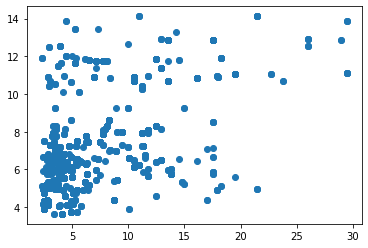

In [148]:
plt.scatter(x=y_test,y=pred_test)

In [149]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv=KFold(n_splits=10, random_state=1, shuffle=True)
cv1=cross_val_score(model1,Xpt,Y,cv=cv)
score1=cv1.mean()
print(round(score1*100,2))

28.11


# 2. Random Forest Regressor

In [150]:
model2=RandomForestRegressor()
model2.fit(x_train,y_train)
pred_test=model2.predict(x_test)
pred_train=model2.predict(x_train)

In [151]:
print(round(r2_score(y_test,pred_test)*100,2))

72.98


In [152]:
print(round(r2_score(y_train,pred_train)*100,2))

69.12


In [153]:
print(round(mean_absolute_percentage_error(y_test,pred_test),2))

0.25


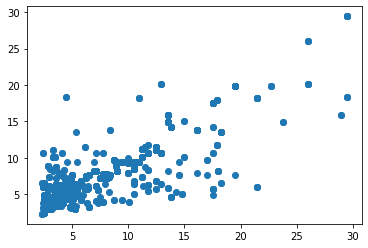

In [154]:
plt.scatter(x=y_test,y=pred_test)

In [155]:
cv=KFold(n_splits=10, random_state=1, shuffle=True)
cv1=cross_val_score(model2,Xpt,Y,cv=cv)
score1=cv1.mean()
print(round(score1*100,2))

68.01


# 3. Decision Tree Regressor

In [156]:
dt=DecisionTreeRegressor()
model3=dt.fit(x_train,y_train)
pred_test=model3.predict(x_test)
pred_train=model3.predict(x_train)

In [157]:
print(round(r2_score(y_test,pred_test)*100,2))

72.91


In [158]:
print(round(r2_score(y_train,pred_train)*100,2))

69.29


In [159]:
print(round(mean_absolute_percentage_error(y_test,pred_test),2))

0.26


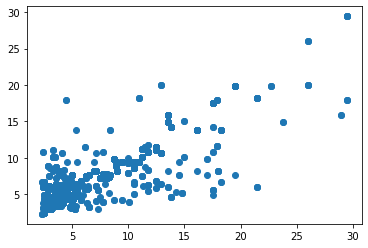

In [160]:
plt.scatter(x=y_test,y=pred_test)

In [161]:
cv=KFold(n_splits=10, random_state=1, shuffle=True)
cv1=cross_val_score(model3,Xpt,Y,cv=cv)
score1=cv1.mean()
print(round(score1*100,2))

68.02


# 4.KNN

In [162]:
knn=KNeighborsRegressor(n_neighbors=4)
model4=knn.fit(x_train,y_train)
pred_test=model4.predict(x_test)
pred_train=model4.predict(x_train)

In [163]:
print(round(r2_score(y_test,pred_test)*100,2))

63.02


In [164]:
print(round(r2_score(y_train,pred_train)*100,2))

58.73


In [165]:
print(round(mean_absolute_percentage_error(y_test,pred_test),2))

0.25


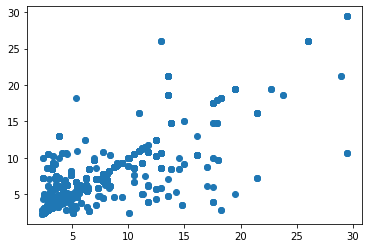

In [166]:
plt.scatter(x=y_test,y=pred_test)

In [167]:
cv=KFold(n_splits=10, random_state=1, shuffle=True)
cv1=cross_val_score(model4,Xpt,Y,cv=cv)
score1=cv1.mean()
print(round(score1*100,2))

58.49


The Random Forest Model and Decision Tree Model are efficient models since Linear Regression and K Neighbours Models are having low r2 score for both training and test data. 

# Hyperparameter Tuning

In [229]:
from sklearn.model_selection import RandomizedSearchCV

In [240]:
rf=RandomForestRegressor()
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [241]:
param_dist={"max_depth": [10,20,30,40,50,60,70,80],
            "criterion": ["squared_error","friedman_mse","absolute_error","poisson"],
            "ccp_alpha":[0.0,0.1,0.2],
            'min_samples_split':[2,3,4,5,6,7]}
           

In [258]:
samples=7  # number of random samples 
randomCV=RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=samples,cv=3)

In [259]:
final=randomCV.fit(x_train,y_train)

In [260]:
print(final.best_params_)

{'min_samples_split': 5, 'max_depth': 60, 'criterion': 'poisson', 'ccp_alpha': 0.0}


In [261]:
pred1=final.predict(x_test)

In [262]:
pred2=final.predict(x_train)

In [263]:
print(round(r2_score(y_test,pred1)*100,2))

72.91


In [264]:
print(round(r2_score(y_train,pred2)*100,2))

69.29


In [265]:
print(round(mean_absolute_percentage_error(y_test,pred1),2))

0.26


# After hyper tuning improvement of 0.17 was found in r2 score of train data.

# Saving the model

In [266]:
import pickle
pickle.dump(final, open('Car_Price_Prediction','wb'))

In [267]:
pickled_model=pickle.load(open('Car_Price_Prediction','rb'))
pickled_model.predict(x_test)

array([26.        ,  7.06785714,  9.4125    , ...,  8.34155844,
        3.34042857,  7.25836066])